In [1]:
# Notebook to explore classification of planar data
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testCases_v2 import *

np.random.seed(1)

        


In [2]:
import math
x1 = np.linspace(0.0, math.pi/2.0, 100)
print (x1)

[0.         0.01586663 0.03173326 0.04759989 0.06346652 0.07933315
 0.09519978 0.11106641 0.12693304 0.14279967 0.1586663  0.17453293
 0.19039955 0.20626618 0.22213281 0.23799944 0.25386607 0.2697327
 0.28559933 0.30146596 0.31733259 0.33319922 0.34906585 0.36493248
 0.38079911 0.39666574 0.41253237 0.428399   0.44426563 0.46013226
 0.47599889 0.49186552 0.50773215 0.52359878 0.53946541 0.55533203
 0.57119866 0.58706529 0.60293192 0.61879855 0.63466518 0.65053181
 0.66639844 0.68226507 0.6981317  0.71399833 0.72986496 0.74573159
 0.76159822 0.77746485 0.79333148 0.80919811 0.82506474 0.84093137
 0.856798   0.87266463 0.88853126 0.90439789 0.92026451 0.93613114
 0.95199777 0.9678644  0.98373103 0.99959766 1.01546429 1.03133092
 1.04719755 1.06306418 1.07893081 1.09479744 1.11066407 1.1265307
 1.14239733 1.15826396 1.17413059 1.18999722 1.20586385 1.22173048
 1.23759711 1.25346374 1.26933037 1.28519699 1.30106362 1.31693025
 1.33279688 1.34866351 1.36453014 1.38039677 1.3962634  1.412130

In [3]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

[[-0.94775989 -0.58400216]
 [-0.66273873  1.10950716]
 [-0.51513585  0.98630034]
 [ 0.30095084 -0.17106547]
 [ 0.03461458 -0.23539512]
 [ 0.62432597 -0.04046374]
 [ 0.81510594 -0.1277709 ]
 [ 1.68414491  0.21152489]
 [-0.34594799  1.06180943]
 [ 0.52559885 -0.54725063]] (200, 2)
(200,)


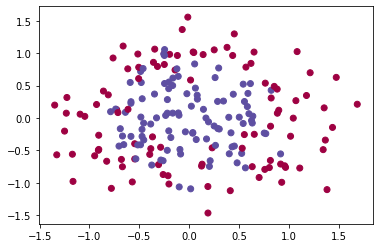

In [4]:
X=noisy_circles[0]
Y=noisy_circles[1]
print(X[:10], X.shape)
print(Y.shape)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)


In [5]:
from sklearn.linear_model import LogisticRegressionCV
# Train the logistic regression classifier
X, Y = load_planar_dataset()
clf = LogisticRegressionCV();
clf.fit(X.T, Y.T);

def my_plot_boundary(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    print("x_min =" , x_min, "x_max = ", x_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(xx.shape)
    print(yy.shape)
    print("Shape of X", X.shape)
    print("Shape of Y", Y.shape)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


x_min = 0.20444229225431898 x_max =  4.576114148128845
(365, 438)
(365, 438)
Shape of X (400, 2)
Shape of Y (400, 1)
[1 2 3 4 5 6 7 8 9]
[1 2 3 4]
[[1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]]
[[1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4]]
Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


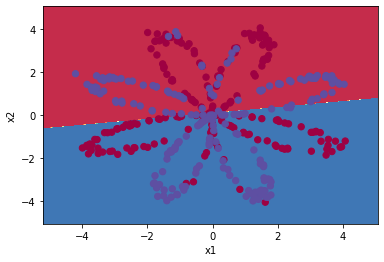

In [6]:
# Plot the decision boundary for logistic regression
my_plot_boundary(lambda x:clf.predict(x), X.T, Y.T)

a1 = np.arange(1, 10, 1)
print(a1)
b1 = np.arange(1, 5, 1)
print(b1)
aa, bb = np.meshgrid(a1, b1)
print(aa)
print(bb)
plot_decision_boundary(lambda x: clf.predict(x), X, np.squeeze(Y))
#xx = X.T[:,0]
#yy = X.T[:,1]
#Z = Y.T
#plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
#plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [7]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    print("n_x  = {}, n_y = {}".format(n_x, n_y))
    return n_x, n_h, n_y
    
layer_sizes(X, Y)
print(X.shape)
print(Y.shape)

n_x  = 2, n_y = 1
(2, 400)
(1, 400)


In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

n_x  = 5, n_y = 2
The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [9]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
        
        

In [10]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [11]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [13]:
np.dot([2,3], [1,2])

8

In [14]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.dot(np.squeeze(Y), np.squeeze(np.log(A2))) + np.dot(np.squeeze(1-Y), np.squeeze(np.log(1-A2)))
    cost = - logprobs / m
    ### END CODE HERE ###
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [15]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [16]:

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 -Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims=True) / m
    dZ1 = np.matmul(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1.0 / m * np.matmul(dZ1, X.T)
    db1 = 1.0 /m  * np.sum(dZ1, axis = 1, keepdims = True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [17]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [18]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [19]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [45]:
import pandas as pd
from IPython.display import display, HTML

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (np.squeeze(A2) > 0.5)
    ### END CODE HERE ###
    
    return predictions

def predict_one(parameters, data_point):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.matmul(W1, data_point) + b1
    A1 = np.tanh(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = sigmoid(Z2)
    print("data_point =", data_point)
    print("W1 = ", W1)
    print("b1 = ", b1)
    print("Z1 = ", Z1)
    print("A1 = ", A1)
    print("W2 = ", W2)
    print("b2 = ", b2)
    print("Z2 = ", Z2)
    print("A2 = ", A2)
    print (A2)

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # print some stats on the training data set.
    print("Starting Neural network training.")
    print("Number of training examples: ", Y.shape[1])
    
    print("Size of input layer, n_x = ", n_x)
    print("Size of the hidden layer, n_h = ", n_h)
    print("Size of the output layer, n_y = ", n_y)
    
    print("Shape of W1 = ", W1.shape)
    print("Shape of b1 = ", b1.shape)
    print("Shape of W2 = ", W2.shape)
    print("Shape of b2 = ", b2.shape)
    
    # TODO: put in the ability to print these parameters.
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
        
        if (i % 1000 == 0):
            #W1 = parameters["W1"]
            #d = pd.DataFrame(data=W1, index = np.arange(0, W1.shape[0], 1), columns=np.arange(0, W1.shape[1], 1))
            #display(d)
            # Plot the decision boundary
            print("Plotting the boundary.")
            plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
    
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Show the parameters being updated. 
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

n_x  = 2, n_y = 1
n_x  = 2, n_y = 1
Starting Neural network training.
Number of training examples:  3
Size of input layer, n_x =  2
Size of the hidden layer, n_h =  4
Size of the output layer, n_y =  1
Shape of W1 =  (4, 2)
Shape of b1 =  (4, 1)
Shape of W2 =  (1, 4)
Shape of b2 =  (1, 1)
Plotting the boundary.
Cost after iteration 0: 0.692739
Plotting the boundary.
Cost after iteration 1000: 0.000218
Plotting the boundary.
Cost after iteration 2000: 0.000107
Plotting the boundary.
Cost after iteration 3000: 0.000071
Plotting the boundary.
Cost after iteration 4000: 0.000053
Plotting the boundary.
Cost after iteration 5000: 0.000042
Plotting the boundary.
Cost after iteration 6000: 0.000035
Plotting the boundary.
Cost after iteration 7000: 0.000030
Plotting the boundary.
Cost after iteration 8000: 0.000026
Plotting the boundary.
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0

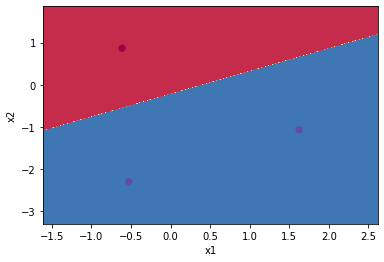

In [28]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

In [29]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


n_x  = 2, n_y = 1
n_x  = 2, n_y = 1
Starting Neural network training.
Number of training examples:  400
Size of input layer, n_x =  2
Size of the hidden layer, n_h =  4
Size of the output layer, n_y =  1
Shape of W1 =  (4, 2)
Shape of b1 =  (4, 1)
Shape of W2 =  (1, 4)
Shape of b2 =  (1, 1)
Plotting the boundary.
Cost after iteration 0: 0.693048
Plotting the boundary.
Cost after iteration 1000: 0.288083
Plotting the boundary.
Cost after iteration 2000: 0.254385
Plotting the boundary.
Cost after iteration 3000: 0.233864
Plotting the boundary.
Cost after iteration 4000: 0.226792
Plotting the boundary.
Cost after iteration 5000: 0.222644
Plotting the boundary.
Cost after iteration 6000: 0.219731
Plotting the boundary.
Cost after iteration 7000: 0.217504
Plotting the boundary.
Cost after iteration 8000: 0.219449
Plotting the boundary.
Cost after iteration 9000: 0.218556


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

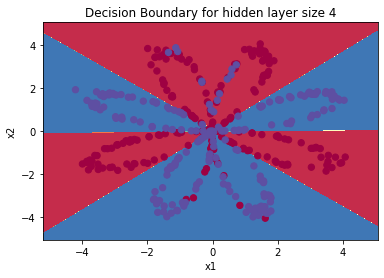

In [46]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, np.squeeze(Y))
plt.title("Decision Boundary for hidden layer size " + str(4))

In [47]:
predict_one(parameters, np.array([1.0, 0.3]).reshape(2,1))


data_point = [[1. ]
 [0.3]]
W1 =  [[  0.14446194  -9.68516834]
 [-11.13255069   3.33888327]
 [-11.46577373 -13.41879594]
 [  9.25560346 -10.19786581]]
b1 =  [[ 0.01581546]
 [-0.40865778]
 [-0.0649438 ]
 [ 0.01700755]]
Z1 =  [[ -2.7452731 ]
 [-10.53954348]
 [-15.55635631]
 [  6.21325126]]
A1 =  [[-0.99178272]
 [-1.        ]
 [-1.        ]
 [ 0.99999198]]
W2 =  [[-11.98555075   3.44417249   6.15134975  10.52120482]]
b2 =  [[-0.06602583]]
Z2 =  [[12.74663449]]
A2 =  [[0.99999709]]
[[0.99999709]]
